# Анализ продаж интернет магазина компьютерных игр

# Задача
<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
По Данным 2016 года интернет магазина "Стримчик" (продает по всему миру компьютерные игры) __выявить определяющие успешность игры закономерности.__
    
</div>

# План:


<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

1. [Знакомство с данными](#1.-Знакомство-с-данными)

    - [Считать файл.](#Считывание-файла)
    - [Вывести информацию о таблице.](#Вывод-информации-о-таблице)


2. [Предобработка данных](#2.-Предобработка-данных)

   - [Изменение названия столбцов.](#Изменение-названий-столбцов)
   - [Удалить дубликаты](#Удаление-дубликатов)
   - [Обработать пропуски.](#Обработка-пропусков)
   - [Преобразование типов данных.](#Преобразование-типов-данных)
   - [Подсчитать суммарные продажи по регионам.](#Подсчет-суммарных-продаж-по-регионам)
   - [Вывод](#Вывод-о-предобработке-данных)


3. [Исследовательский анализ данных](#3.-Исследовательский-анализ-данных)

   - [Проанализировать количество игр по году выпуска.](#Анализ-количества-игр-по-году-выпуска)
   - [Посмотреть на изменение продаж по платформам.](#Изменение-продаж-по-платформам)
   - [Взять даннныхе за __актуальный период__ (определить самостоятельно). Не учитывать данные за предыдущие года.](#Понятие-актуального-периода)
   - [Обпеделить потенциально прибыльные платформы.](#Анализ-потенциально-прибыльных-платформ)
   - [Построить график по глобальным продажам игр по платформам.](#Глобальная-продажа-игр-по-платформам)
   - [Проанализировать влияние отзывов пользователей и критиков на продажи внтри одной популярной платформы. Сформулировать выводы.](#Анализ-влияния-отзывов-на-продажи-PS4)
   - [Соотнести выводы с продажами игр на других платформах](#Анализ-продаж-на-других-платформах)
   - [Посмотреть на общее распределение игр по жанрам.](#Анализ-распределений-игр-по-жанрам)
   - [Вывод](#Вывод-об-исследовательском-анализе-данных)


4. [Составление пользовательского портрета. Определить для пользователя каждого региона(NA, EU, JP):](#4.-Составление-пользовательского-портрета)
    - [Самые популярные платформы (топ-5). Описать различия в долях продаж.](#Самые-популярные-платформы)
    - [Самые популярные жанры (топ-5). Объяснить разницу.](#Самые-популярные-жанры)
    - [Выяснить влияет ли рейтинг ESRB на продажи в отдельном регионе.](#Влияние-рейтинга-на-продажи)
    - [Вывод](#Вывод-о-составлении-пользовательского-портрета)
 
 
5. [Проверка гипотез](#5.-Проверка-гипотез)

    - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#Сравнение-рейтингов-платформ-XOne-и-PC)
    - [Средние пользовательские рейтинги жанров Action и Sports разные.](#Сравнение-рейтингов-жанров-Action-и-Sports)
    - [Вывод](#Вывод-по-проверке-гипотез)


6. [Вывод](#6.-Вывод)

    
</div>

# 1. Знакомство с данными

## Считывание файла

In [6]:
%pip uninstall kaleido

Note: you may need to restart the kernel to use updated packages.


In [7]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import scipy.stats as st

%matplotlib inline

pd.set_option('display.max_rows', None)
plt.rcParams['figure.figsize'] = [10, 6]

In [8]:
def print_data(*data):
    for i in data:
        row, col = i.shape
        print(f'В таблице строк: {row}, колонок: {col}')
        display(i.head(10))
        display(i.info())
        print('\n\n')

In [9]:
games = pd.read_csv('games.csv')

print_data(games)

В таблице строк: 16715, колонок: 11


Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

## Вывод информации о таблице

In [11]:
def print_data(*data):
    for i in data:
        row, col = i.shape
        print(f'В таблице строк: {row}, колонок: {col}')
        display(i.head(10))
        display(i.info())
        print('\n\n')

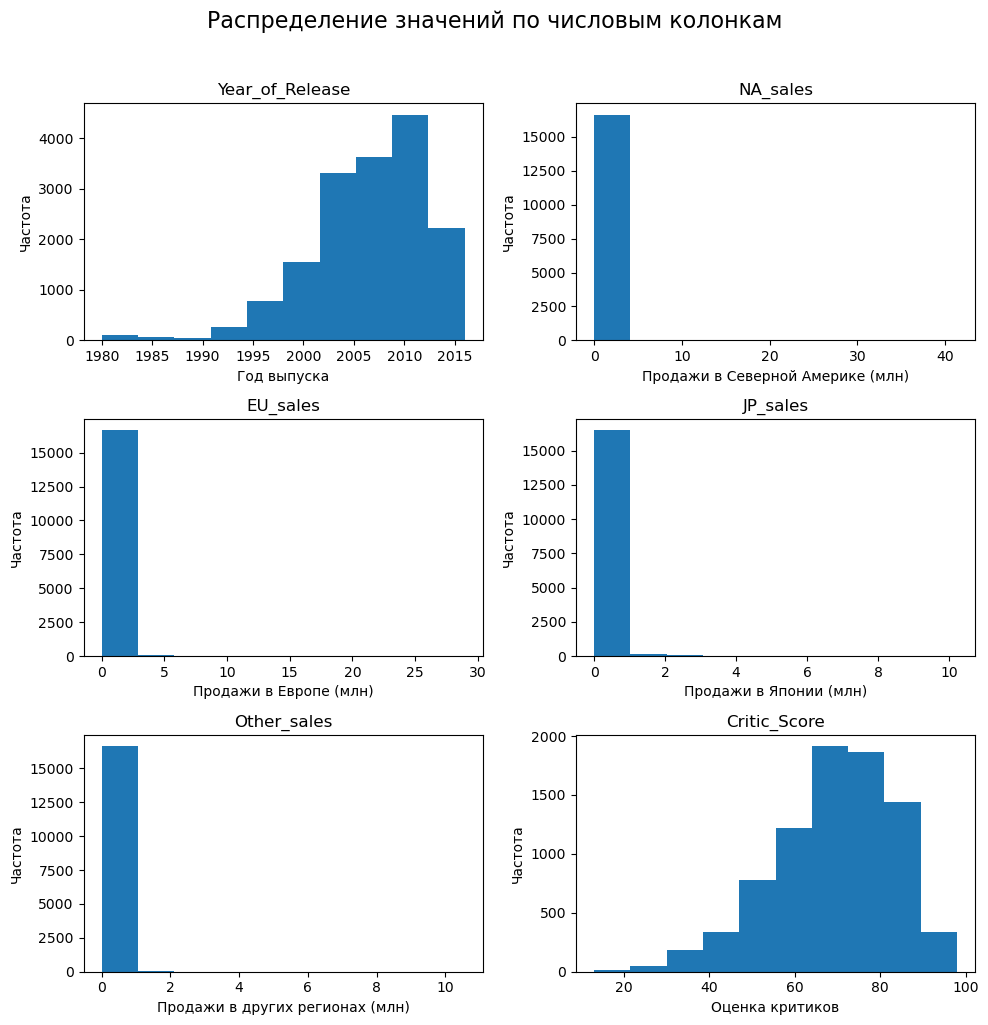

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

columns = ['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']
x_labels = [
    'Год выпуска', 
    'Продажи в Северной Америке (млн)', 
    'Продажи в Европе (млн)', 
    'Продажи в Японии (млн)', 
    'Продажи в других регионах (млн)', 
    'Оценка критиков'
]
y_labels = ['Частота'] * len(columns)

for ax, col, x_label, y_label in zip(axes, columns, x_labels, y_labels):
    games[col].plot.hist(ax=ax, bins=10)
    ax.set_title(col)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    
fig.suptitle('Распределение значений по числовым колонкам', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

Перед нами таблица `games` с данными о продажах компьютерных игр по всему миру

В ней:
 - строк: 16715
 - колонок: 11

|колонка|описание|
|:-------|:--------|
|Name|название игры|
|Platform|платформа|
|Year_of_Release|год выпуска|
|Genre|жанр игры|
|NA_sales|продажи в Северной Америке (миллионы проданных копий)|
|EU_sales|продажи в Европе (миллионы проданных копий)|
|JP_sale|продажи в Японии (миллионы проданных копий)|
|Other_sales|продажи в других странах (миллионы проданных копий)|
|Critic_Score|оценка критиков (максимум 100)|
|User_Score|оценка пользователей (максимум 10)|
|Rating| рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.|
    
    
</div>

<div style="background-color: #B8F0D6; padding: 20px; border: 1px solid #192C57;">
    <h3 style="margin-top: 0; margin-bottom: 10px;">Навигация</h3> 
    <a href="#План:" style="color: #1406C2; text-decoration: underline; margin-top: 30px;">Перейти к плану</a>
</div>

# 2. Предобработка данных

## Изменение названий столбцов 

In [17]:
games.columns = games.columns.str.lower()

In [18]:
display(games.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

Привел название столбцов к нижнему регистру
    
</div>

## Удаление дубликатов

In [21]:
games[games.duplicated()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [22]:
games[games.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E

In [23]:
# Удалим эти строки
games = games.drop_duplicates(subset=['name', 'year_of_release', 'platform'], keep='first')

# check
games[games.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

Явных дубликатов не обнаружено.
    
Найдены неявные дубликаты по сумме колонок __name__, __year_of_release__ и __platform__. Оставил только первые вхождения, остальное удалил.
    
</div>

## Обработка пропусков

In [26]:
games.shape

(16713, 11)

In [27]:
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Удалим строки в которых в поле `name` и `genre` пропущены значения

In [29]:
games = games.dropna(subset=['name', 'genre']).reset_index(drop=True)

Пропуски в колонке `year_of_release` удалим.

In [31]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

In [32]:
# Посмотрим на значения в столбце rating
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;"><a id="rating"></a>
    
Значения и их определения

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «K-A» — «Старая абривиатура E»

[Источник](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)


Заменим __K-A__ на __E__, а значения __NaN__ на __unspecified__
    
</div>

In [34]:
games['rating'] = games['rating'].replace('K-A', 'E').fillna('unspecified')

In [35]:
#check
games['rating'].unique()

array(['E', 'unspecified', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'],
      dtype=object)

In [36]:
games[games['user_score'].isna() & (games['critic_score'].isna()) & (games['rating'] == 'unspecified')].shape

(6534, 11)

Видим, что большинство пропущенных значений встречаются сразу в колонках `crutuc_score`, `user_score` и `rating`. Это может говорить нам о том, что у игр в регионе __JP__ возрастной рейтинг не формируется, а так же не собираются оценки критиков и пользователей.

Заполним пропуски в колонках `critic_score`, `user_score` на -1, чтобы в дальнейшем помнить про их существование.

In [39]:
games.fillna(-1, inplace=True)

В столбце `user_score` значение __tbd__ - означает, что оценка не была рассчитана. Заменим это значение на -1

In [41]:
games['user_score'] = games['user_score'].replace('tbd', -1).astype('float32')

In [42]:
#check
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

## Преобразование типов данных

In [44]:
print_data(games)

В таблице строк: 16443, колонок: 11


name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0     41.36     28.96      3.77         8.45          76.0         8.0   
1     29.08      3.58      6.81         0.77          -1.0        -1.0   
2     15.68     12.76      3.79         3.29          82.0         8.3   
3     15.61     10.93      3.28         2.95          80.0         8.0   
4     11.27      8.89     10.22         1.00          -1.0        -1.0   
5     23.20      2.26      4.22         0.58          -1.0        -1.0   
6     11.28      9.14      6.50         2.88          89.0         8.5   
7     13.96      9.18      2.93         2.84          58.0         6.6   
8     14.44      6.94      4.70         2.24          87.0         8.4   
9     26.93      0.63      0.28         0.47          -1.0        -1.0   

        rating  
0            E  
1  unspecified  
2            E  
3            E  
4  unspecified  
5  unspecified  
6            E  
7            E  
8            E  
9  unspecified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float32
 10  rating           16443 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


None

In [45]:
games['year_of_release'] = games['year_of_release'].astype('int16')
games['critic_score'] = games['critic_score'].astype('int32')


for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    games[col] = games[col].astype('float32')

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
Стоблец `year_of_release` привел к _int16_

Столбец `critic_score` привел к _int32_

Столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales` привел к _float32_
    
</div>

## Подсчет суммарных продаж по регионам

In [48]:
def calculation_of_amount_sales(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

In [49]:
games['amount_sales'] = games.apply(calculation_of_amount_sales, axis=1).astype('float32').round(2)

In [50]:
print_data(games)

В таблице строк: 16443, колонок: 12


name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

    na_sales   eu_sales  jp_sales  other_sales  critic_score  user_score  \
0  41.360001  28.959999      3.77         8.45            76         8.0   
1  29.080000   3.580000      6.81         0.77            -1        -1.0   
2  15.680000  12.760000      3.79         3.29            82         8.3   
3  15.610000  10.930000      3.28         2.95            80         8.0   
4  11.270000   8.890000     10.22         1.00            -1        -1.0   
5  23.200001   2.260000      4.22         0.58            -1        -1.0   
6  11.280000   9.140000      6.50         2.88            89         8.5   
7  13.960000   9.180000      2.93         2.84            58         6.6   
8  14.440000   6.940000      4.70         2.24            87         8.4   
9  26.930000   0.630000      0.28         0.47            -1        -1.0   

        rating  amount_sales  
0            E     82.540001  
1  unspecified     40.240002  
2            E     35.520000  
3            E     32.770000  
4  unspecified     31.379999  
5  unspecified     30.260000  
6            E     29.799999  
7            E     28.910000  
8            E     28.320000  
9  unspecified     28.309999

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float32
 5   eu_sales         16443 non-null  float32
 6   jp_sales         16443 non-null  float32
 7   other_sales      16443 non-null  float32
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float32
 10  rating           16443 non-null  object 
 11  amount_sales     16443 non-null  float32
dtypes: float32(6), int16(1), int32(1), object(4)
memory usage: 995.7+ KB


None

## Вывод о предобработке данных

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">


В результате Предобработки данных бело сделано следующее:

- Название столбцов привел к нижнему регистру.
- Обнаружены неявные дуюликаты, удалил их.
- Удалил строки в которых в столббцах `name` и `genre` были пропущенные значения. В данном столбце всего 1 пропуск, скорее всего связан с техническими проблемами (некорректно извлекли данные из базы или случайно попали в базу данных)
- Удалил сроки с пропуском в `year_of_release`, они занимали всего 1,6%. Пропуски могут быть связаны с тем, что в этот год игра не выходила на платформе, а ее по ошибке включили в базу.
- Столбец `rating` состоит из
    - «EC» («Early childhood») — «Для детей младшего возраста»
    - «E» («Everyone») — «Для всех»
    - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
    - «T» («Teen») — «Подросткам»
    - «M» («Mature») — «Для взрослых»
    - «AO» («Adults Only 18+») — «Только для взрослых»
    - «RP» («Rating Pending») — «Рейтинг ожидается»
    - «K-A» — «Старая абривиатура E»
    
    [Источник](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)
    
    
- Замениk __K-A__ на __E__, а значения __NaN__ на __unspecified__
- Заполнил пропуски в колонках `critic_score`, `user_score` на -1, чтобы в дальнейшем помнить про их существование. Видим, что большинство пропущенных значений встречаются сразу в колонках `crutuc_score`, `user_score` и `rating`. Это может говорить нам о том, что у игр в регионе __JP__ возрастной рейтинг не формируется, а так же не собираются оценки критиков и пользователей.


- В столбце `user_score` значение __tbd__ - означает, что оценка не была рассчитана. Заменим это значение на - 1
- Стоблец `year_of_release` привел к _int16_
- Столбец `critic_score` привел к _int32_
- Столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales` привел к _float32_
- Создал новый столбец `amount_sales` с суммарной продажей по регионам для каждой игры.

В итоге в таблице осталось 16567 строки и 12 колонок.

</div>

<div style="background-color: #B8F0D6; padding: 20px; border: 1px solid #192C57;">
    <h3 style="margin-top: 0; margin-bottom: 10px;">Навигация</h3> 
    <a href="#План:" style="color: #1406C2; text-decoration: underline; margin-top: 30px;">Перейти к плану</a>
</div>

# 3. Исследовательский анализ данных

## Анализ количества игр по году выпуска

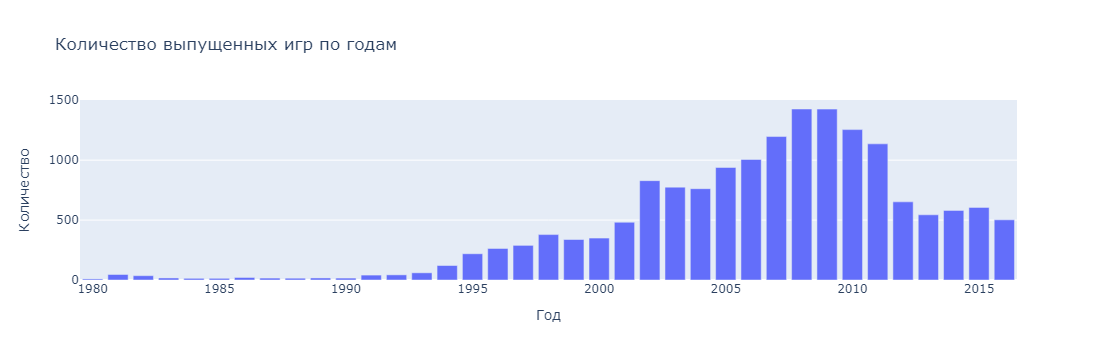

count    16443.00
mean      2006.49
std          5.88
min       1980.00
25%       2003.00
50%       2007.00
75%       2010.00
max       2016.00
Name: year_of_release, dtype: float64

In [56]:
years_release = games.groupby('year_of_release')['name'].agg('count')

fig = go.Figure(data=go.Bar(x=years_release.index, y=years_release))

fig.update_layout(
    title="Количество выпущенных игр по годам",
    xaxis_title="Год",
    yaxis_title="Количество"
)
fig.show()

games['year_of_release'].describe().round(2)

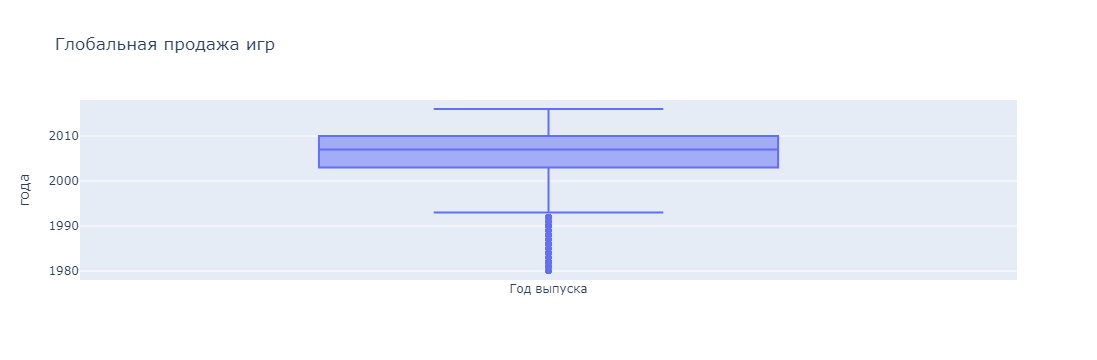

In [57]:
fig = go.Figure()
fig.add_trace(go.Box(y=games['year_of_release'], name='Год выпуска'))

fig.update_layout(
    title="Глобальная продажа игр",
    yaxis_title="года"
)
fig.show()

## Изменение продаж по платформам

Оценим суммарнное кличество продаж на платформах

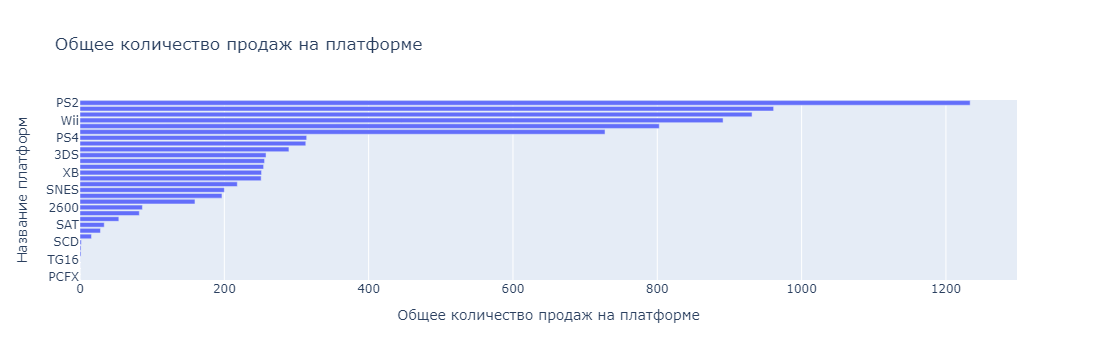

In [60]:
platform_sales = games.pivot_table(
    index='platform',
    values='amount_sales',
    aggfunc='sum'
).sort_values(by='amount_sales')


fig = go.Figure(data=go.Bar(x=platform_sales['amount_sales'], y=platform_sales.index, orientation='h'))

fig.update_layout(
    title='Общее количество продаж на платформе',
    xaxis_title="Общее количество продаж на платформе",
    yaxis_title="Название платформ"
)
fig.show()

Наблюдаем топ 6 плаформ:

- PS2
- X360
- Wii
- PS3
- DS
- PS

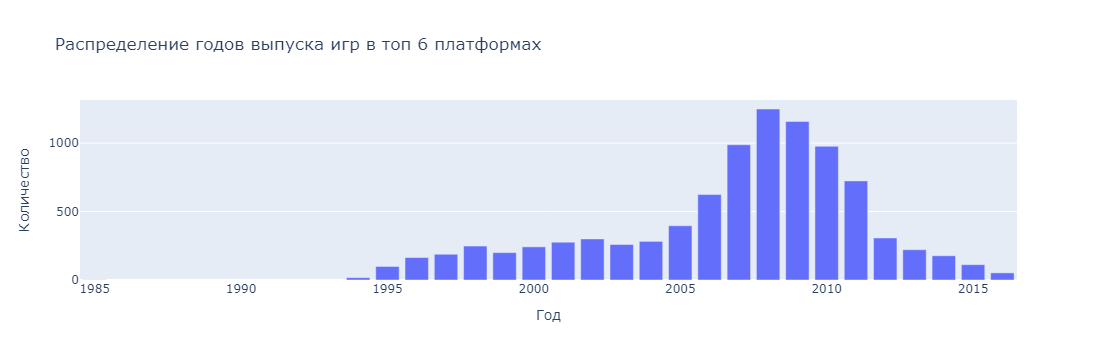

count      24.0
mean      386.0
std       365.0
min         1.0
25%       174.0
50%       254.0
75%       453.0
max      1249.0
Name: platform, dtype: float64

In [62]:
platform_year_release = (
    games
    .query("platform in ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']")
    .pivot_table(
        index='year_of_release',
        values='platform',
        aggfunc='count'
))

fig = go.Figure(data=go.Bar(x=platform_year_release.index, y=platform_year_release['platform']))

fig.update_layout(
    title="Распределение годов выпуска игр в топ 6 платформах",
    xaxis_title="Год",
    yaxis_title="Количество"
)
fig.show()

platform_year_release['platform'].describe().round()

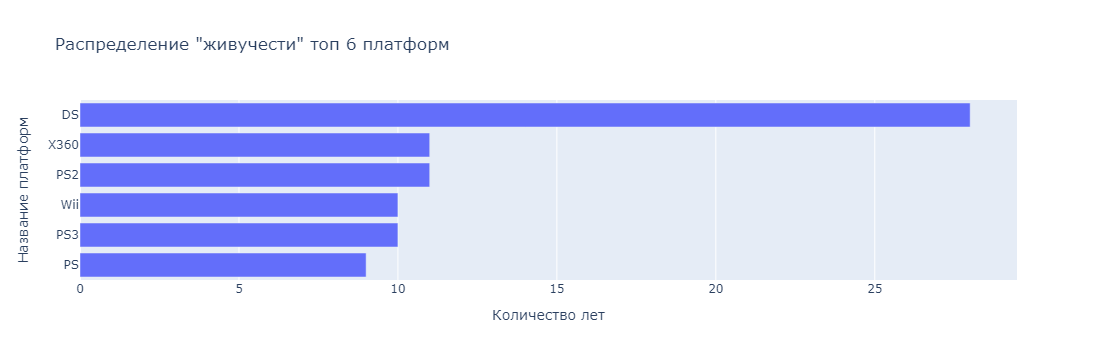

count     6.0
mean     13.0
std       7.0
min       9.0
25%      10.0
50%      10.0
75%      11.0
max      28.0
Name: number_of_years, dtype: float64

platform
PS      1994
PS3     2006
Wii     2006
PS2     2000
X360    2005
DS      1985
Name: min_year, dtype: int16

In [63]:
platform_year_release = (
    games
    .query("platform in ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']")
    .pivot_table(
        index='platform',
        values='year_of_release',
        aggfunc=['min', 'max']
))

platform_year_release.columns = 'min_year', 'max_year'

platform_year_release['number_of_years'] = platform_year_release['max_year'] - platform_year_release['min_year'] 

platform_year_release = platform_year_release.sort_values(by='number_of_years')

fig = go.Figure(data=go.Bar(x= platform_year_release['number_of_years'], y=platform_year_release.index, orientation='h')) 

fig.update_layout(
    title='Распределение "живучести" топ 6 платформ',
    xaxis_title="Количество лет",
    yaxis_title="Название платформ"
)
fig.show()

display(platform_year_release['number_of_years'].describe().round())
display(platform_year_release['min_year'])

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

Смотря на топ 6 платформ, сделаем выводы.

В среднем происходит 10 лет между первым выходом игры на платформах и последним релизом.

Максимальная "живучесть" платформы - 28 лет. Это платформа _DS_.
    
</div>

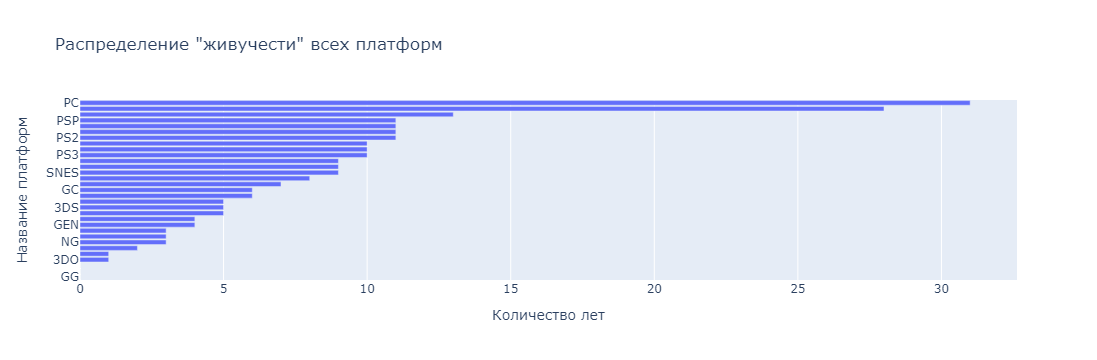

count    31.0
mean      8.0
std       7.0
min       0.0
25%       3.0
50%       6.0
75%      10.0
max      31.0
Name: number_of_years, dtype: float64

In [65]:
platform_year_release = (
    games
    .pivot_table(
        index='platform',
        values='year_of_release',
        aggfunc=['min', 'max']
))

platform_year_release.columns = 'min_year', 'max_year'

platform_year_release['number_of_years'] = platform_year_release['max_year'] - platform_year_release['min_year'] 

platform_year_release = platform_year_release.sort_values(by='number_of_years')

fig = go.Figure(data=go.Bar(x=platform_year_release['number_of_years'], y=platform_year_release.index, orientation='h')) 

fig.update_layout(
    title='Распределение "живучести" всех платформ',
    xaxis_title="Количество лет",
    yaxis_title="Название платформ"
)
fig.show()



platform_year_release['number_of_years'].describe().round()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
Если смотреть на все платформы в целом, то средняя "живучесть" платформы упадет до 6 лет, а максимальная поднимется до 31 года - платформа _PC_.
</div>

## Понятие актуального периода

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
Исходя из вышесказанного, делаем вывод, что актуальным периодом можно считать 2013-2016 года. 

В среднем платформы живут примерно 6 лет, так же количество игр заметно растет с 2005 года и падает начиная с 2013 года. Будем считать актуальным период, начиная с 2013 года и дальше.
</div>

In [69]:
games = games.query('year_of_release >= 2013')

In [70]:
print_data(games)

В таблице строк: 2233, колонок: 12


name platform  year_of_release  \
16                         Grand Theft Auto V      PS3             2013   
23                         Grand Theft Auto V     X360             2013   
31                  Call of Duty: Black Ops 3      PS4             2015   
33                        Pokemon X/Pokemon Y      3DS             2013   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
60                       Call of Duty: Ghosts     X360             2013   
69                       Call of Duty: Ghosts      PS3             2013   
72                                  Minecraft     X360             2013   
77                                    FIFA 16      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16        Action      7.02      9.09      0.98         3.96            97   
23        Action      9.66      5.14      0.06         1.41            97   
31       Shooter      6.03      5.86      0.36         2.38            -1   
33  Role-Playing      5.28      4.19      4.35         0.78            -1   
42        Action      3.96      6.31      0.38         1.97            97   
47  Role-Playing      4.35      3.49      3.10         0.74            -1   
60       Shooter      6.73      2.56      0.04         0.91            73   
69       Shooter      4.10      3.63      0.38         1.25            71   
72          Misc      5.70      2.65      0.02         0.81            -1   
77        Sports      1.12      6.12      0.06         1.28            82   

    user_score       rating  amount_sales  
16         8.2            M     21.049999  
23         8.1            M     16.270000  
31        -1.0  unspecified     14.630000  
33        -1.0  unspecified     14.600000  
42         8.3            M     12.620000  
47        -1.0  unspecified     11.680000  
60         2.6            M     10.240000  
69         2.6            M      9.360000  
72        -1.0  unspecified      9.180000  
77         4.3            E      8.580000

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int16  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float32
 5   eu_sales         2233 non-null   float32
 6   jp_sales         2233 non-null   float32
 7   other_sales      2233 non-null   float32
 8   critic_score     2233 non-null   int32  
 9   user_score       2233 non-null   float32
 10  rating           2233 non-null   object 
 11  amount_sales     2233 non-null   float32
dtypes: float32(6), int16(1), int32(1), object(4)
memory usage: 152.6+ KB


None

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
Получили таблицу с 2233 строками и 12 колонками
</div>

## Анализ потенциально прибыльных платформ

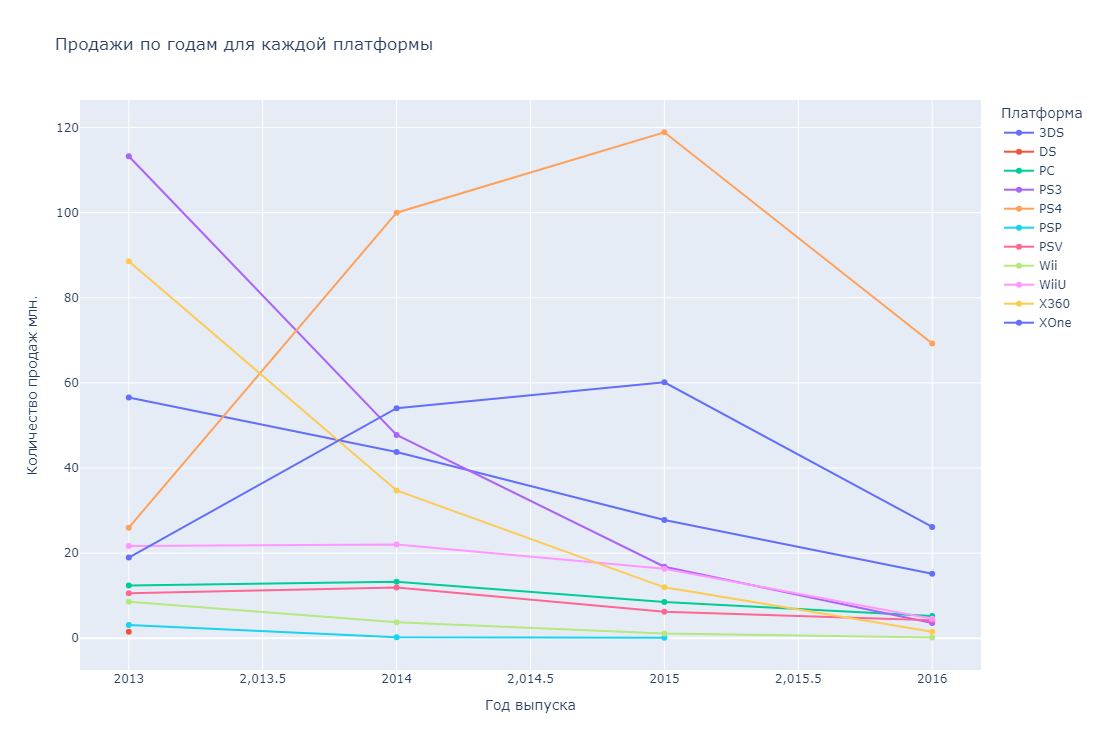

In [73]:
sales_by_year = (games
                 .pivot_table(
                    index=['year_of_release', 'platform'],
                    values='amount_sales',
                    aggfunc='sum'
                 )
                 )
sales_by_year_unstack = sales_by_year.unstack(level='platform')

fig = go.Figure()

for platform in sales_by_year_unstack.columns.get_level_values(1):
    fig.add_trace(go.Scatter(
        x=sales_by_year_unstack.index,
        y=sales_by_year_unstack['amount_sales', platform],
        mode='lines+markers',
        name=platform,
        text=[f"Год: {year}, Продажи: {sales}" for year, sales in zip(sales_by_year_unstack.index, sales_by_year_unstack['amount_sales', platform])],
        hoverinfo='text'
    ))

fig.update_layout(
    title="Продажи по годам для каждой платформы",
    xaxis_title="Год выпуска",
    yaxis_title="Количество продаж млн.",
    legend_title="Платформа",
    hovermode="closest",
    template="plotly",
    width=900,
    height=750
)

fig.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
По графику заметна общаяя тенденция на спад продаж игр, скорее всего это связано с популяризацией смартфонов.


Видим, что `PS4`, `XOne`, `3DS` показывают неположие результаты (Лидируют) над остальными платформами.

Выход игр на `X360` заметно сократился, из за выхода на рынок платформы `XOne`.

Аналогично произошло и с `PS3`, игры на данную платформу стали выходить заменто реже, после выхода `PS4`.

С остальными платформами дела обстоят так же, продажи игр идут на спад.
</div>

## Глобальная продажа игр по платформам

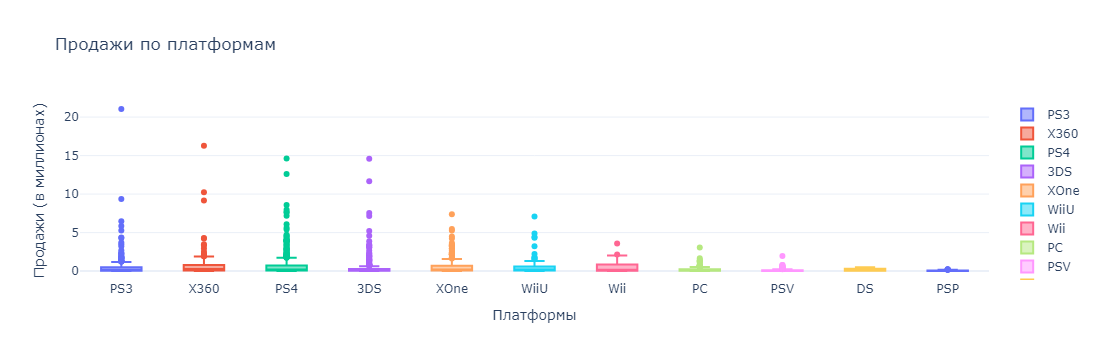

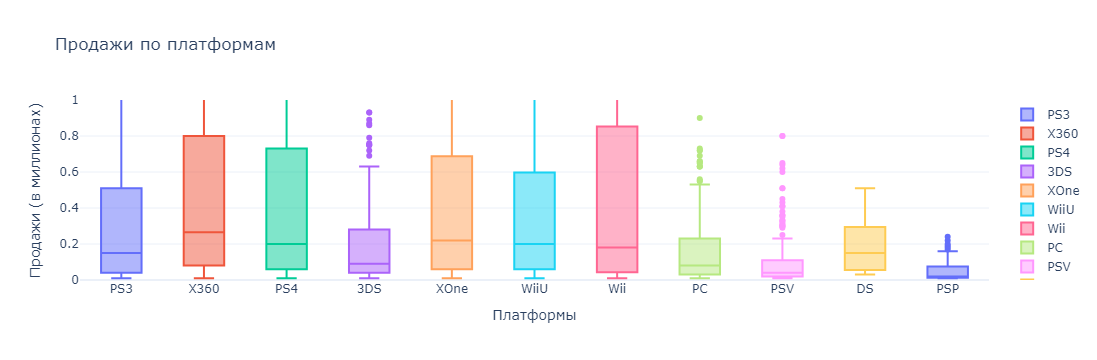

In [76]:
platform_amount_sales = (games
                            .pivot_table(
                                index=['name','platform'],
                                values='amount_sales'
                            )
                             .sort_values('amount_sales', ascending=False)
                             .reset_index()
                        )

data = []

for platform in platform_amount_sales['platform'].unique():
    curr = platform_amount_sales[platform_amount_sales['platform'] == platform]['amount_sales']
    data.append(go.Box(y=curr, name=platform))
    
layout = {'title': 'Продажи по платформам'}
fig = go.Figure(data=data, layout=layout)

fig.layout.template = 'plotly_white'
fig.update_layout(
    xaxis_title='Платформы',
    yaxis_title='Продажи (в миллионах)'
)

fig.show()

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    yaxis=dict(range=[0, 1]),
    xaxis_title='Платформы', 
    yaxis_title='Продажи (в миллионах)'
)
fig.layout.template = 'plotly_white'

fig.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
Максимальное значение продаж наблюдается у платформы `PS3` - 21.05 млн, далее идут `X360`, `PS4`, `3DS` и `Xone`. 
    

`PSP`, `PSV` имеют значительно меньший размах и медиану, что говорит о меньшей популярности.

</div>

## Анализ влияния отзывов на продажи PS4

In [79]:
def drow_user_critic_score(data, platform):
    user_score = data.query(f"user_score > 0 and platform == '{platform}'")
    critic_score = data.query(f"critic_score > 0and platform == '{platform}'")
    
    
    fig = go.Figure()


    fig.add_trace(go.Scatter(
        x=user_score['user_score'], 
        y=user_score['amount_sales'], 
        mode='markers',
        marker=dict(color='blue', size=8),
        opacity=0.6,
    ))

    fig.update_layout(
        title=f"График рассеянея отзывов user к продажам на платформе {platform}",
        xaxis_title="оценки",
        yaxis_title="продажи",
    )

    fig.show()
    
    
    fig = go.Figure()


    fig.add_trace(go.Scatter(
        x=critic_score['critic_score'], 
        y=critic_score['amount_sales'], 
        mode='markers',
        marker=dict(color='blue', size=8),
        opacity=0.6,
    ))

    fig.update_layout(
        title=f"График рассеянея отзывов critic к продажам на платформе {platform}",
        xaxis_title="оценки",
        yaxis_title="продажи",
    )
    fig.show()
    
    print('Коэффициект корреляции между user_score и amount_sales: {}'
          .format(user_score['user_score'].corr(user_score['amount_sales']).round(2)))
    print('Коэффициект корреляции между critic_score и amount_sales: {}'
          .format(critic_score['critic_score'].corr(critic_score['amount_sales']).round(2)))

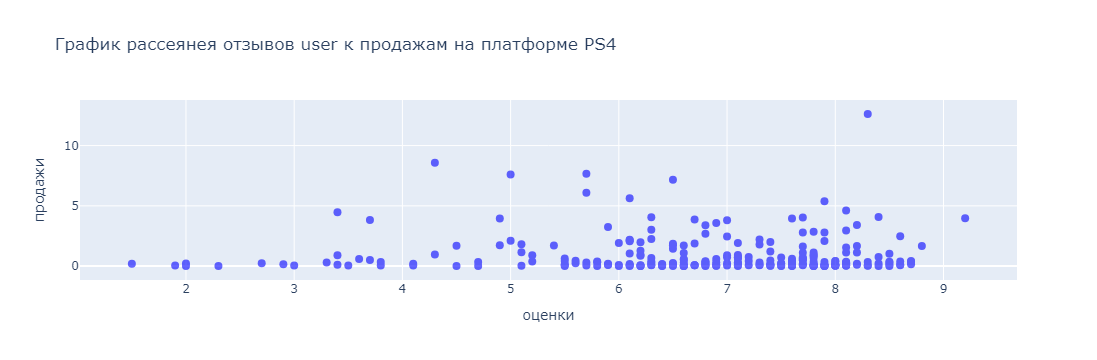

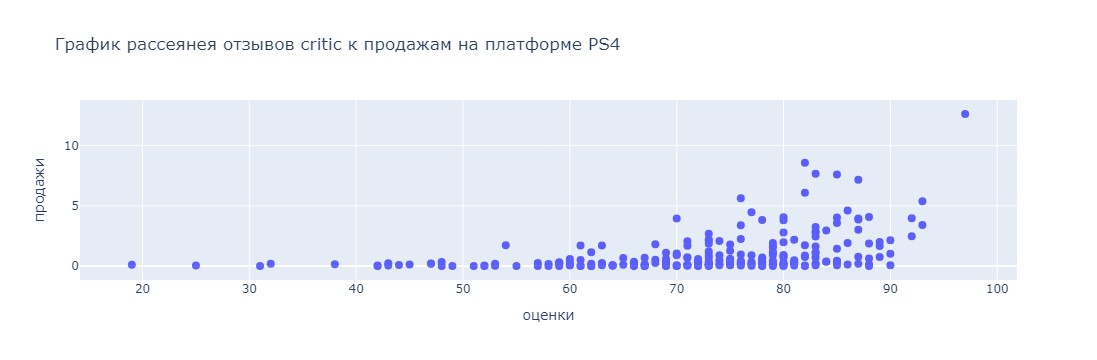

Коэффициект корреляции между user_score и amount_sales: -0.03
Коэффициект корреляции между critic_score и amount_sales: 0.41


In [80]:
drow_user_critic_score(games, 'PS4')

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
 
Построив диаграмму рассеивания и посчитам корелляционную матрицу, можно сделать вывод, что оценки пользователей
не зависят на продажи игр (коэффициент корреляции $\approx -0.03$). Коэффициент корреляции межжду оценками критиков и продажами $\approx 0.41$. Это значит, что оценки критиков влияют на общие продажи больше чем оценки простых пользователей. 
</div>

## Анализ продаж на других платформах

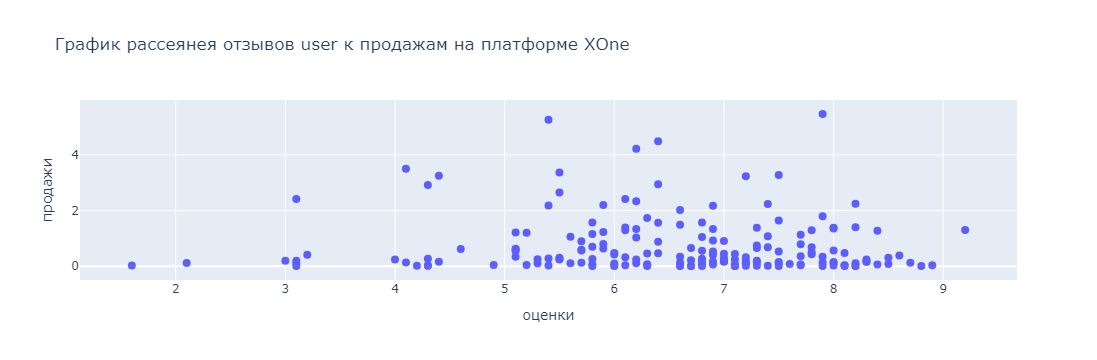

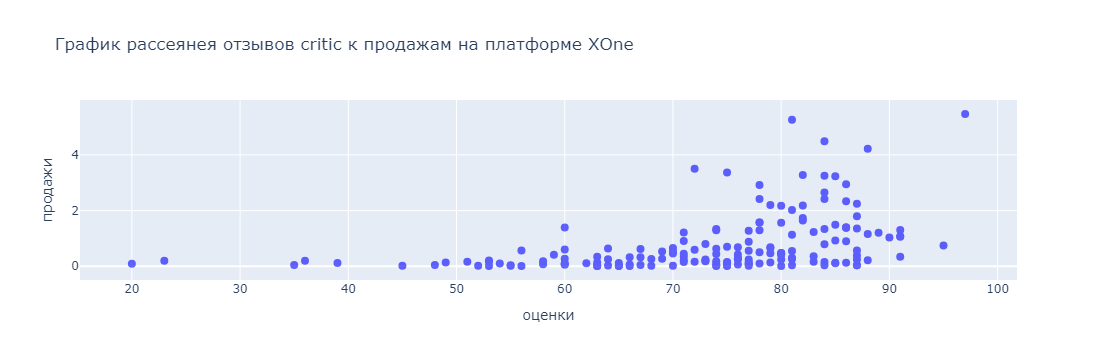

Коэффициект корреляции между user_score и amount_sales: -0.07
Коэффициект корреляции между critic_score и amount_sales: 0.42


In [83]:
drow_user_critic_score(games, 'XOne')

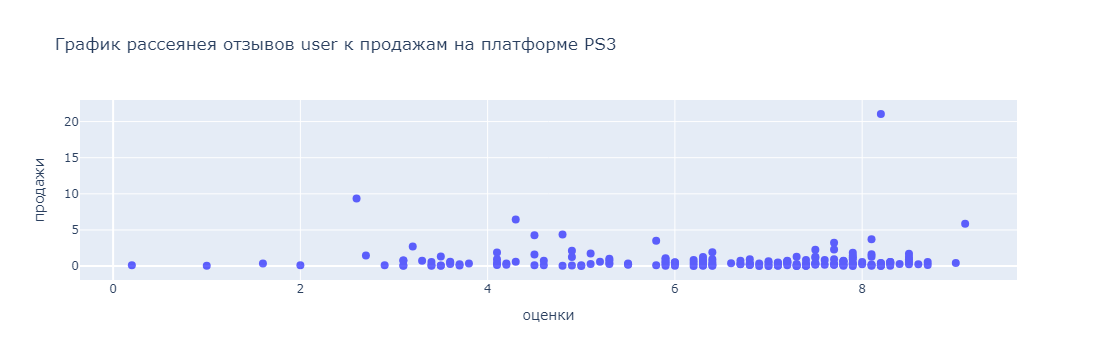

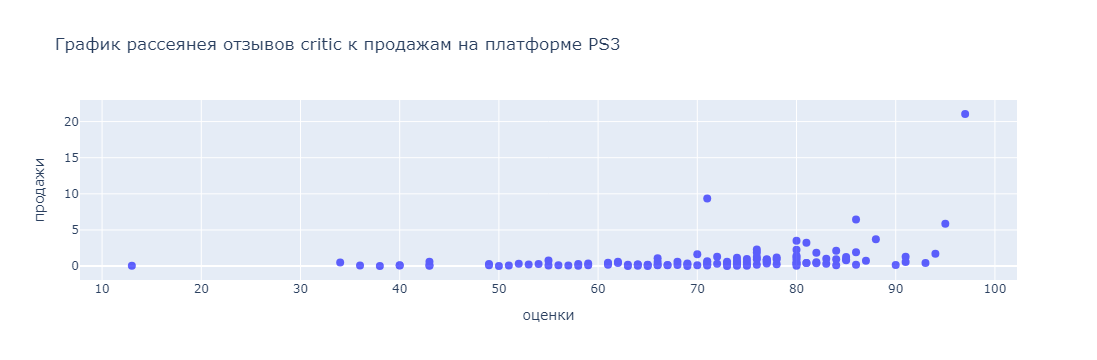

Коэффициект корреляции между user_score и amount_sales: 0.0
Коэффициект корреляции между critic_score и amount_sales: 0.33


In [84]:
drow_user_critic_score(games, 'PS3')

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
 
Проанализировав популярные платформы `PS4`, `XOne`, `PS3`. Наблюдаем, что оценки пользователей не влияют на продажи. Что нельзя сказать про оценки критиков, между общими продажами и оценками критиков присутствует __умеренная положительная зависимость__, но она не имеет большой силы.
    
</div>

# Анализ распределений игр по жанрам

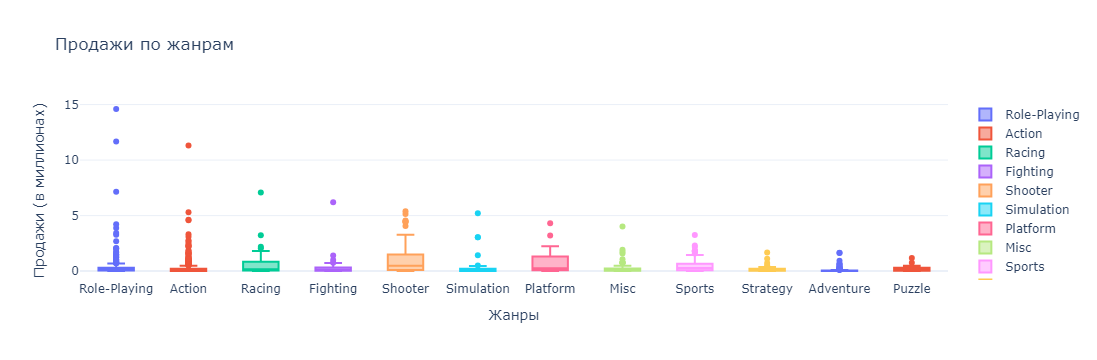

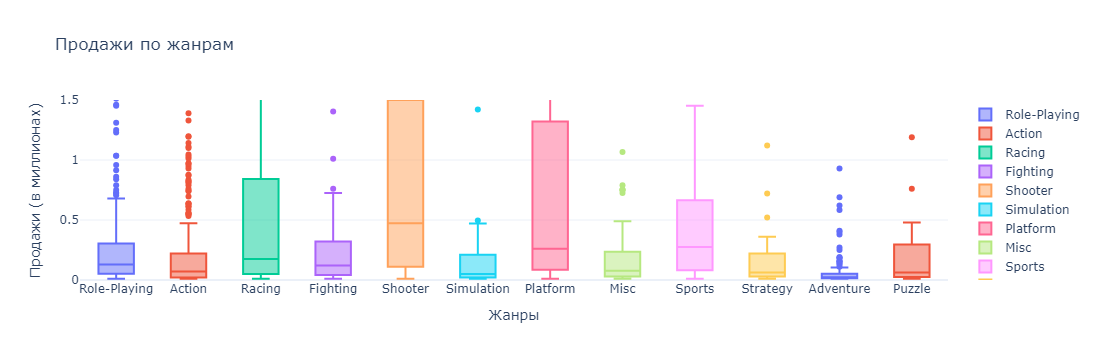

In [87]:
genre_amount_sales = (games
                            .pivot_table(
                                index=['name','genre'],
                                values='amount_sales'
                            )
                             .sort_values('amount_sales', ascending=False)
                             .reset_index()
                        )

data = []

for genre in genre_amount_sales['genre'].unique():
    curr = genre_amount_sales[genre_amount_sales['genre'] == genre]['amount_sales']
    data.append(go.Box(y=curr, name=genre))
    
layout = {'title': 'Продажи по жанрам'}
fig = go.Figure(data=data, layout=layout)

fig.layout.template = 'plotly_white'
fig.update_layout(
    xaxis_title='Жанры',
    yaxis_title='Продажи (в миллионах)'
)

fig.show()

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    yaxis=dict(range=[0, 1.5]),
    xaxis_title='Жанры', 
    yaxis_title='Продажи (в миллионах)'
)
fig.layout.template = 'plotly_white'

fig.show()

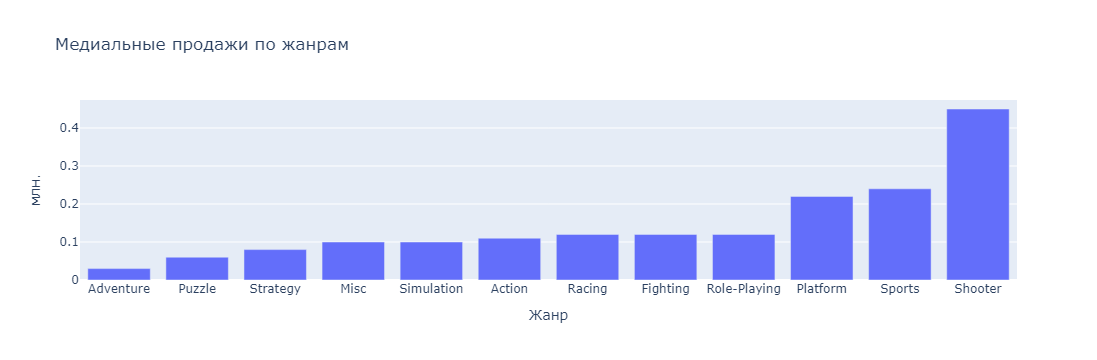

In [88]:
genre_group = games.groupby('genre')['amount_sales'].median().sort_values().round(2)

fig = go.Figure(data=go.Bar(x=genre_group.index, y=genre_group))


fig.update_layout(
    title="Медиальные продажи по жанрам",
    xaxis_title="Жанр",
    yaxis_title="млн."
)
fig.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

    
Самые большие медиальные продажи у игр из жанра `Shooter` - 0.45 млн., затем идут `Sports`, `Platform`, `Role-Playing`, `Racing` и так далее.
    
На последнем месте продажи у жанра `Adventure` - 0.03 млн.    

    
</div>

## Вывод об исследовательском анализе данных

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

Убрал все игры выпущенные до 1993 года, так как их малое количество.

Определили топ 6 платформ по продажам за все года:

1. PS2
2. X360
3. Wii
4. PS3
5. DS
6. PS

В среднем топ 6 платформ живут 10 лет. Самая живучая платформа - _DS_ (28 лет)

Если считать среднее по всем платформам, средняя "продолжительность жизни" платформы будет равна: 6 лет. Больше всех живет платформма _PC_ - 1 год. 


Обозначим актуальный период: 2013-2016 года.

В среднем платформы живут примерно 6 лет, так же количество игр заметно растет с 2005 года и падает начиная с 2013 года. Будем считать актуальным период, начиная с 2013 года. Данные до 2013 года в дальнейших расчетах не учитываются.

Наблюдается сильный спад в продажах начиная с 2010 года. Скорее всего связанный с популяризацией смартфонов.

Имеются 2 лидера по продажам в актуальный период: `PS4` и `XOne`.


Что касается конкретных платформ, у `PS4` (как и во всех остальных платформах) присутствует умеренная положительная зависимость между оценками критиков и общей выручкой.
Коэффициент корреляции в общем случае равен $\approx 0.35$

Наблюдаем большой дизбаланс в выручке по жанрам, максимальная средняя выручка у `Shooter` - 0.45 млн., минимальная у `Adventure` - 0.03 млн.
    
---
    
В ходе исследовательского анализа данных был выбран __актуальный период__ (с 2013 года), по которому в дальнейшем будут проверяться гипотезы. Обнаружено 2 явных лидера: `PS4` и `XOne`. Самые популярные жанры игр: `Shooter`, `Sports`, `Platform`, `Role-Playing`, `Racing`
    
</div>

<div style="background-color: #B8F0D6; padding: 20px; border: 1px solid #192C57;">
    <h3 style="margin-top: 0; margin-bottom: 10px;">Навигация</h3> 
    <a href="#План:" style="color: #1406C2; text-decoration: underline; margin-top: 30px;">Перейти к плану</a>
</div>

# 4. Составление пользовательского портрета

## Самые популярные платформы

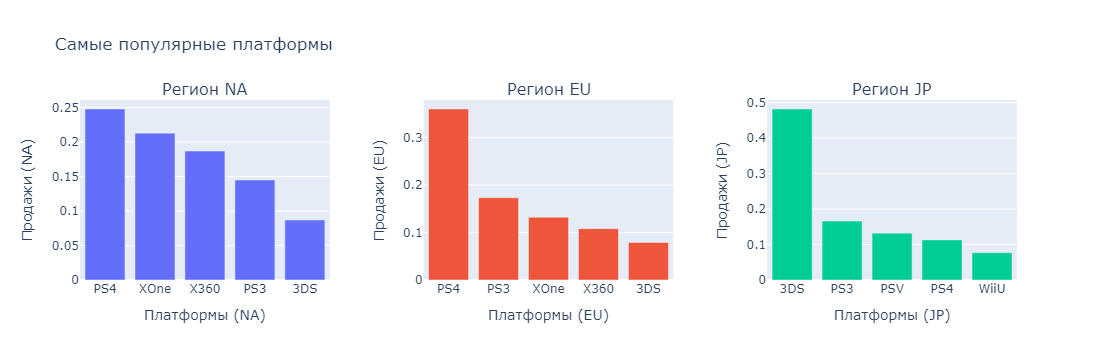

In [95]:
na_popular_platforms =  (games
                         .groupby('platform')['na_sales']
                         .sum().sort_values(ascending=False)[:5] \
                         /  games.groupby('platform')['na_sales'].sum().sum()).round(3)

eu_popular_platforms =  (games
                         .groupby('platform')['eu_sales']
                         .sum().sort_values(ascending=False)[:5] \
                         / games.groupby('platform')['eu_sales'].sum().sum()).round(3)

jp_popular_platforms =  (games
                         .groupby('platform')['jp_sales']
                         .sum().sort_values(ascending=False)[:5] \
                         / games.groupby('platform')['jp_sales'].sum().sum()).round(3)


fig = make_subplots(rows=1, cols=3, subplot_titles=("Регион NA", "Регион EU", "Регион JP"), horizontal_spacing=0.1)

fig.add_trace(
    go.Bar(x=na_popular_platforms.index, y=na_popular_platforms, name="NA"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=eu_popular_platforms.index, y=eu_popular_platforms, name="EU"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=jp_popular_platforms.index, y=jp_popular_platforms, name="JP"),
    row=1, col=3
)

fig.update_layout(
    title="Самые популярные платформы",
    showlegend=False,
    xaxis_title="Платформы (NA)",
    yaxis_title="Продажи (NA)",
    xaxis2_title="Платформы (EU)",
    yaxis2_title="Продажи (EU)",
    xaxis3_title="Платформы (JP)",
    yaxis3_title="Продажи (JP)",
)

fig.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
  
__Регион NA:__
    
Самая популярная платформа - _PS4_. Далее идут  _XOne_, _X360_, _PS3_, _3DS_.
    
__Регион EU:__
    
Самая популярная платформа - _PS4_. Далее идут _PS3_, _XOne_, _X360_, _PC_.
    
__Регион JP:__
    
Самая популярная платформа - _3DS_. Далее идут _PS3_, _PSV_, _PS4_, _WiiU_.
</div>

## Самые популярные жанры

In [98]:
def top_5_genres(region: str):
    genres = (games
                .groupby('genre')[region]
                .sum() /  games.groupby('genre')[region].sum().sum()).round(3)
    
    genres = genres.reset_index()
    genres.columns = ['genre', region]
    
    top_genres = genres.nlargest(5, region)
    
    other = genres[~genres[region].isin(top_genres[region])][region].sum()
    
    genre = pd.concat([top_genres, pd.DataFrame({'genre': ['other'], region: [other]})], ignore_index=True)
    return genre
    

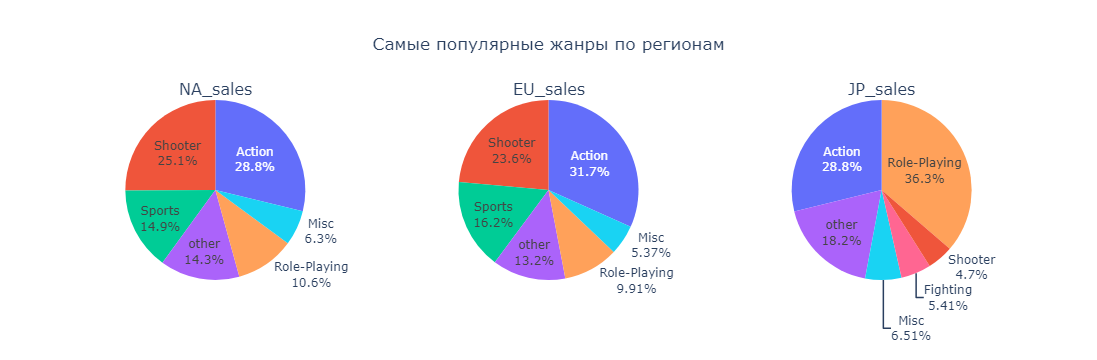

In [99]:
na_popular_genre = top_5_genres('na_sales')
eu_popular_genre = top_5_genres('eu_sales')
jp_popular_genre = top_5_genres('jp_sales')



fig = make_subplots(
    rows=1, cols=3,  # Один ряд, две колонки
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=("NA_sales", "EU_sales", 'JP_sales')
)

fig.add_trace(
    go.Pie(
        labels=na_popular_genre['genre'], 
        values=na_popular_genre['na_sales'], 
        name="NA",
        textinfo='label+percent'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=eu_popular_genre['genre'], 
        values=eu_popular_genre['eu_sales'], 
        name="EU",
        textinfo='label+percent'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Pie(
        labels=jp_popular_genre['genre'], 
        values=jp_popular_genre['jp_sales'], 
        name="JP",
        textinfo='label+percent'
    ),
    row=1, col=3
)

fig.update_layout(
    title="Самые популярные жанры по регионам",
    title_x=0.5,
    showlegend=False
)

fig.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
  
__Регион NA:__
    
Самая популярные жанры - _Action_. Далее идут _Shooter_, _Sports_, _Role-Playing_, _Misc_.
    
__Регион EU:__
    
Самая популярные жанры - _Action_. Далее идут _Shooter_, _Sports_, _Role-Playing_, _Racing_.
    
__Регион JP:__
    
Самая популярные жанры - _Role-Playing_. Далее идут _Action_, _Misc_, _Fighting_, _Shooter_.
    
</div>

## Влияние рейтинга на продажи

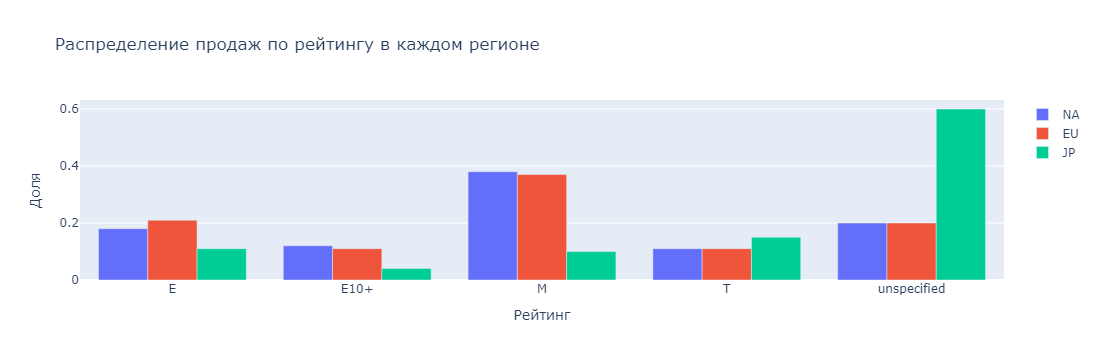

In [102]:
na_rating = (games.groupby('rating')['na_sales'].sum() / games.groupby('rating')['na_sales'].sum().sum()).round(2)
eu_rating = (games.groupby('rating')['eu_sales'].sum() / games.groupby('rating')['eu_sales'].sum().sum()).round(2)
jp_rating = (games.groupby('rating')['jp_sales'].sum() / games.groupby('rating')['jp_sales'].sum().sum()).round(2)


fig = go.Figure()

fig.add_trace(
    go.Bar(x=na_rating.index, y=na_rating, name="NA")
)

fig.add_trace(
    go.Bar(x=eu_rating.index, y=eu_rating, name="EU")
)

fig.add_trace(
    go.Bar(x=jp_rating.index, y=jp_rating, name="JP")
)

fig.update_layout(
    title="Распределение продаж по рейтингу в каждом регионе",
    xaxis_title="Рейтинг",
    yaxis_title="Доля "
)

fig.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
[Расшифровка категорий](#rating)
  
Наблюдаем примерно одинаковое распределение по рейтингу в Регионах __NA__ и __EU__.

Что касается региона __JP__, наблюдается сильная просадка в продажах игр во всех значениях рейтинга, кроме тех игр, у которых рейтинг не указан. Это связано с тем, что рейтинг __ESRB__ формируется в основном, по играм выпущеным в США и Европпе. Поэтому для игр из региона __JP__ он не считается.
    
</div>

## Вывод о составлении пользовательского портрета

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
 
Пользовательские портреты в регионах __NA__ и __EU__ очень похожи. У них одинаковые платформы в топ 4, аналогично популярные жанры и примерно одинаковое распределение продаж по рейтингу.
    
Что касается пользователей из __JP__, то у них значительно отличается портрет пользователя от других регионов. 
    
---    
    
    
__Самые популярные платформы:__
    

__Регион NA:__
    
Самая популярная платформа - _PS4_ (доля продаж - 0.248). Далее идут _XOne_ (доля продаж - 0.213), _X360_ (доля продаж - 0.187), _PS3_ (доля продаж - 0.145), _3DS_ (доля продаж - 0.087).
    
__Регион EU:__
    
Самая популярная платформа - _PS4_ (доля продаж - 0.36). Далее идут _PS3_ (доля продаж - 0.173), _XOne_ (доля продаж - 0.132), _X360_ (доля продаж - 0.108), _PC_ (доля продаж - 0.079).
    
__Регион JP:__
    
Самая популярная платформа - _3DS_ (доля продаж - 0.482). Далее идут _PS3_ (доля продаж - 0.166), _PSV_ (доля продаж - 0.132), _PS4_ (доля продаж - 0.113), _WiiU_ (доля продаж - 0.077).


В регионах __NA__ и __EU__ платформы в первой пятерке одинаковы, с точностью до места в топе.
    
В регионе __JP__ на первое место выходит _3DS_, замыкает пятерку лидеров WiiU.
    
    
---
    
__Самые популярные жанры:__
    
 __Регион NA:__
    
Самая популярные жанры - Action_ (доля продаж - 28%). Далее идут _Shooter_ (доля продаж - 25.1%), _Sports_ (доля продаж - 14.9%), _Role-Playing_ (доля продаж - 10.6%), _Misc_ (доля продаж - 6.3%).
    
__Регион EU:__
    
Самая популярные жанры - Action_ (доля продаж - 31.7%). Далее идут _Shooter_ (доля продаж - 23.6%), _Sports_ (доля продаж - 16.2%), _Role-Playing_ (доля продаж - 9.91%), _Misc_ (доля продаж - 5.37%).
    
__Регион JP:__
    
Самая популярные жанры - Role-Playing_ (доля продаж - 36.3%). Далее идут _Action_ (доля продаж - 288%), _Misc_ (доля продаж - 6.51%), _Fighting_ (доля продаж - 5.4%), _Shooter_ (доля продаж - 4.7%).


    
В регионах __NA__ и __EU__ близкие доли продаж в топ 4 по жанрам. 
    
Регион __JP__ как и в прошлом пункте отличается. На первое место выходит _Role-Playing_, далее _Action_, _Misc_,_Flighting_, _Shooter_ .    
    

---
    
__Влияние рейтинга на продажи:__
    
Как и прежде регионы __NA__ и __EU__ похожи между собой в плане продаж. 

В этих регионах больше всего продаж у игр с рейтингом _M(«Для взрослых»)_. Далее идут игры с рейтингами _E_, _unspecified_, _E10+_ и _T_ соответственно.

В регионе __JP__ наблюдается сильная просадка в продажах игр во всех значениях рейтинга, кроме тех игр, у которых рейтинг не указан(_unspecified_). Это связано с тем, что рейтинг ESRB формируется в основном, по играм выпущеным в США и Европпе. Поэтому для игр из региона JP он не считается. Далее идут игры с рейтингами _T_, _E_, _M_. Меньше всего продано игр с рейтингом _E10+_.
    
    
</div>

<div style="background-color: #B8F0D6; padding: 20px; border: 1px solid #192C57;">
    <h3 style="margin-top: 0; margin-bottom: 10px;">Навигация</h3> 
    <a href="#План:" style="color: #1406C2; text-decoration: underline; margin-top: 30px;">Перейти к плану</a>
</div>

# 5. Проверка гипотез

## Сравнение рейтингов платформ XOne и PC

Гипотезы:

$H_0:$ Средние пользовательские рейтинги платформ __XOne__ и __PC__ статистически одинаковые.

$H_1:$ Средние пользовательские рейтинги статистически отличаются.

In [110]:
result = st.ttest_ind(
                    games.query('platform == "XOne" and user_score > -1')['user_score'],
                    games.query('platform == "PC" and user_score > -1')['user_score'],
                    equal_var=False,
                    alternative='two-sided'
                    )

pvalue = result[1]
print(f'p-value: {pvalue}')
alpha = .05

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.147597032047728
Не отвергаем нулевую гипотезу


<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

На имеющихся данных, на уровне значимости $\alpha = 5\%$ нет основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформ __XOne__ и __PC__
 

__Пояснение:__

$H_0$ сформулирована по условию, $H_1$ сформулирована двухсторонней, потому что нам не важно больше или меньше среднее одной из выборок, нам важно отличие средних.

Так как у нас имеются 2 независимые выборки, то будем использоваеть двухсторонний _тест Стьюдента_, уровень значимость $\alpha$ выберем 5%.
    
</div>

## Сравнение рейтингов жанров Action и Sports 

Гипотезы:

$H_0:$ Средние пользовательские рейтинги жанров _Action_ и _Sports_ статистически равны. 

$H_1:$ Средние пользовательские рейтинги статистически не равны.

In [114]:
result = st.ttest_ind(
                    games.query('genre == "Action" and user_score > -1')['user_score'],
                    games.query('genre == "Sports" and user_score > -1')['user_score'],
                    equal_var=False,
                    alternative='two-sided'
                    )

pvalue = result[1]
print(f'p-value: {pvalue}')
alpha = .05

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 1.4459989209941613e-20
Отвергаем нулевую гипотезу


<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

На имеющихся данных, на уровне значимости $\alpha = 5\%$ есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

__Пояснение:__

$H_0$ сформулирована по условию, $H_1$ сформулирована так, потому что нам не важно больше или меньше среднее одной из выборок, нам важно отличие средних.

Так как у нас имеются 2 независимые выборки, то будем использоваеть двухсторонний _тест Стьюдента_, уровень значимость $\alpha$ выберем 5%.
    
</div>

## Вывод по проверке гипотез

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
В ходе проверки гипотез выяснили следующее.

Средние значения пользовательских рейтингов платформ __XOne__ и __PC__ одинаковые, при уровне значимость $\alpha = 0.05$.
    
Средние значения пользовательских рейтингов жанров __Action__ и __Sports__ не равны, при уровне значимость $\alpha = 0.05$.
    
</div>

<div style="background-color: #B8F0D6; padding: 20px; border: 1px solid #192C57;">
    <h3 style="margin-top: 0; margin-bottom: 10px;">Навигация</h3> 
    <a href="#План:" style="color: #1406C2; text-decoration: underline; margin-top: 30px;">Перейти к плану</a>
</div>

# 6. Вывод

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

После анализа данных за прошлые года, можно сделать следующие выводы.   
    
Наблюдиется общий спад продаж игр на консоли с 2011 года. Поэтому прибыль в 2017 году может быть меньше, чем прибыль в 2016 году. В регионах __NA__ и __EU__ стоит обратить внимание на самую популярную  консоль - __PS4__. Самые популярные жанры в этих регионах - __Action__ и __Shooter__. Больше всего прибыли приносят игры для с возрастным рейтингом "M". Так же при планировании рекламных кампаний стоит прислушиваться к мнению критиков.
    
    
В __JP__ самая популярная консоль это - __3DS__. Самые популярные жанры игр это - __Role-Playing__ и __Action__. В этом регионе не стоит смотреть на возрастной рейтинг игры, потому что большинство игр из этого региона просто не имеют его.
    
    
    
---
    
    
__Знакомство с данными__
    
    
Перед нами таблица `games` с данными о продажах компьютерных игр по всему миру

В ней:
 - строк: 16715
 - колонок: 11

|колонка|описание|
|:-------|:--------|
|Name|название игры|
|Platform|платформа|
|Year_of_Release|год выпуска|
|Genre|жанр игры|
|NA_sales|продажи в Северной Америке (миллионы проданных копий)|
|EU_sales|продажи в Европе (миллионы проданных копий)|
|JP_sale|продажи в Японии (миллионы проданных копий)|
|Other_sales|продажи в других странах (миллионы проданных копий)|
|Critic_Score|оценка критиков (максимум 100)|
|User_Score|оценка пользователей (максимум 10)|
|Rating| рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.|
    
---
    
__Предобработка данных__
    
В результате Предобработки данных бело сделано следующее:

- Название столбцов привел к нижнему регистру.
- Обнаружены неявные дуюликаты, удалил их.
- Удалил строки в которых в столббцах `name` и `genre` были пропущенные значения. В данном столбце всего 1 пропуск, скорее всего связан с техническими проблемами (некорректно извлекли данные из базы или случайно попали в базу данных)
- Удалил сроки с пропуском в `year_of_release`, они занимали всего 1,6%. Пропуски могут быть связаны с тем, что в этот год игра не выходила на платформе, а ее по ошибке включили в базу.
- Столбец `rating` состоит из
    - «EC» («Early childhood») — «Для детей младшего возраста»
    - «E» («Everyone») — «Для всех»
    - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
    - «T» («Teen») — «Подросткам»
    - «M» («Mature») — «Для взрослых»
    - «AO» («Adults Only 18+») — «Только для взрослых»
    - «RP» («Rating Pending») — «Рейтинг ожидается»
    - «K-A» — «Старая абривиатура E»
    
    [Источник](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)
    
    
- Замениk __K-A__ на __E__, а значения __NaN__ на __unspecified__
- Заполнил пропуски в колонках `critic_score`, `user_score` на -1, чтобы в дальнейшем помнить про их существование. Видим, что большинство пропущенных значений встречаются сразу в колонках `crutuc_score`, `user_score` и `rating`. Это может говорить нам о том, что у игр в регионе __JP__ возрастной рейтинг не формируется, а так же не собираются оценки критиков и пользователей.


- В столбце `user_score` значение __tbd__ - означает, что оценка не была рассчитана. Заменим это значение на - 1
- Стоблец `year_of_release` привел к _int16_
- Столбец `critic_score` привел к _int32_
- Столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales` привел к _float32_
- Создал новый столбец `amount_sales` с суммарной продажей по регионам для каждой игры.

В итоге в таблице осталось 16567 строки и 12 колонок.
    
---

__Исследовательский анализ данных__
    
В ходе исследовательского анализа данных был выбран __актуальный период__ (с 2013 года), по которому в дальнейшем будут проверяться гипотезы. Обнаружено 2 явных лидера: `PS4` и `XOne`. Самые популярные жанры игр: `Shooter`, `Sports`, `Platform`, `Role-Playing`, `Racing`
    
---

__Составление пользовательского портрета__
    
    
 
Пользовательские портреты в регионах __NA__ и __EU__ очень похожи. У них одинаковые платформы в топ 4, аналогично популярные жанры и примерно одинаковое распределение продаж по рейтингу.
    
Что касается пользователей из __JP__, то у них значительно отличается портрет пользователя от других регионов. 
    
---    
    
    
__Самые популярные платформы:__
    

__Регион NA:__
    
Самая популярная платформа - _PS4_ (доля продаж - 0.248). Далее идут _XOne_ (доля продаж - 0.213), _X360_ (доля продаж - 0.187), _PS3_ (доля продаж - 0.145), _3DS_ (доля продаж - 0.087).
    
__Регион EU:__
    
Самая популярная платформа - _PS4_ (доля продаж - 0.36). Далее идут _PS3_ (доля продаж - 0.173), _XOne_ (доля продаж - 0.132), _X360_ (доля продаж - 0.108), _PC_ (доля продаж - 0.079).
    
__Регион JP:__
    
Самая популярная платформа - _3DS_ (доля продаж - 0.482). Далее идут _PS3_ (доля продаж - 0.166), _PSV_ (доля продаж - 0.132), _PS4_ (доля продаж - 0.113), _WiiU_ (доля продаж - 0.077).


В регионах __NA__ и __EU__ платформы в первой пятерке одинаковы, с точностью до места в топе.
    
В регионе __JP__ на первое место выходит _3DS_, замыкает пятерку лидеров WiiU.
    
    
---
    
__Самые популярные жанры:__
    
 __Регион NA:__
    
Самая популярные жанры - Action_ (доля продаж - 28%). Далее идут _Shooter_ (доля продаж - 25.1%), _Sports_ (доля продаж - 14.9%), _Role-Playing_ (доля продаж - 10.6%), _Misc_ (доля продаж - 6.3%).
    
__Регион EU:__
    
Самая популярные жанры - Action_ (доля продаж - 31.7%). Далее идут _Shooter_ (доля продаж - 23.6%), _Sports_ (доля продаж - 16.2%), _Role-Playing_ (доля продаж - 9.91%), _Misc_ (доля продаж - 5.37%).
    
__Регион JP:__
    
Самая популярные жанры - Role-Playing_ (доля продаж - 36.3%). Далее идут _Action_ (доля продаж - 288%), _Misc_ (доля продаж - 6.51%), _Fighting_ (доля продаж - 5.4%), _Shooter_ (доля продаж - 4.7%).


    
В регионах __NA__ и __EU__ близкие доли продаж в топ 4 по жанрам. 
    
Регион __JP__ как и в прошлом пункте отличается. На первое место выходит _Role-Playing_, далее _Action_, _Misc_,_Flighting_, _Shooter_ .    
    

---
    
__Влияние рейтинга на продажи:__
    
Как и прежде регионы __NA__ и __EU__ похожи между собой в плане продаж. 

В этих регионах больше всего продаж у игр с рейтингом _M(«Для взрослых»)_. Далее идут игры с рейтингами _E_, _unspecified_, _E10+_ и _T_ соответственно.

В регионе __JP__ наблюдается сильная просадка в продажах игр во всех значениях рейтинга, кроме тех игр, у которых рейтинг не указан(_unspecified_). Это связано с тем, что рейтинг ESRB формируется в основном, по играм выпущеным в США и Европпе. Поэтому для игр из региона JP он не считается. Далее идут игры с рейтингами _T_, _E_, _M_. Меньше всего продано игр с рейтингом _E10+_.
    
---
    
__Проверка гипотез__
    
В ходе проверки гипотез выяснили следующее.

Средние значения пользовательских рейтингов платформ __XOne__ и __PC__ одинаковые, при уровне значимость $\alpha = 5\%$.
    
Средние значения пользовательских рейтингов жанров __Action__ и __Sports__ не равны, при уровне значимость $\alpha = 5\%$.
    

</div>

<div style="background-color: #B8F0D6; padding: 20px; border: 1px solid #192C57;">
    <h3 style="margin-top: 0; margin-bottom: 10px;">Навигация</h3> 
    <a href="#План:" style="color: #1406C2; text-decoration: underline; margin-top: 30px;">Перейти к плану</a>
</div>

# Чек лист выполнения проекта

1. Знакомство с данными

    - [x] Считать файл.
    - [x] Вывести первые строки.
2. Предобработка данных

   - [x] Изменение названия столбцов.
   - [x] Преобразование типов данных.
   - [x] Обработать пропуски.
   - [x] Поссчитать суммарные продажи по регионам.
3. Исследовательский анализ данных

   - [x] Проанализировать количество игр по году выпуска.
   - [x] Посмотреть на изменение продаж по платформам.
   - [x] Взять даннныхе за __актуальный период__ (определить самостоятельно). Не учитывать данные за предыдущие года.
   - [x] Определить потенциально прибыльные платформы.
   - [x] Построить график по глобальным продажам игр по платформам.
   - [x] Проанализировать влияние отзывов пользователей и критиков на продажи внтри одной популярной платформы. Сформулировать выводы.
   - [x] Соотнести выводы с продажами игр на других платформах
   - [x] Посмотреть на общее распределение игр по жанрам. 
5. Составление пользовательского портрета
Определить для пользователя каждого региона(NA, EU, JP):
    - [x] Самые популярные платформы (топ-5). Описать различия в долях продаж.
    - [x] Самые популярные жанры (топ-5). Объяснить разницу.
    - [x] Выяснить влияет ли рейтинг ESRB на продажи в отдельном регионе.      
7. Проверка гипотез

    - [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    - [x] Средние пользовательские рейтинги жанров Action и Sports разные.
    - [x] Пояснить действия
8. Вывод

    - [x] Написан общий вывод
    - [x] Написаны выводы по каждому пункту